In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('elantra.csv')
df.head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,7690,9.7,153,213.377,217.466
1,1,2011,9659,9.1,259,229.353,221.082
2,1,2012,10900,8.2,354,244.178,227.666
3,1,2013,12174,7.9,230,242.560,231.321
4,1,2014,15326,6.6,232,247.575,234.933


In [3]:
df.shape

(50, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         50 non-null     int64  
 1   Year          50 non-null     int64  
 2   ElantraSales  50 non-null     int64  
 3   Unemployment  50 non-null     float64
 4   Queries       50 non-null     int64  
 5   CPI_energy    50 non-null     float64
 6   CPI_all       50 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


In [5]:
df.isnull().sum()

Month           0
Year            0
ElantraSales    0
Unemployment    0
Queries         0
CPI_energy      0
CPI_all         0
dtype: int64

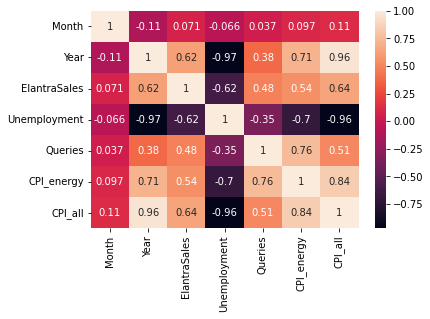

In [6]:
sns.heatmap(df.corr(), annot = True);

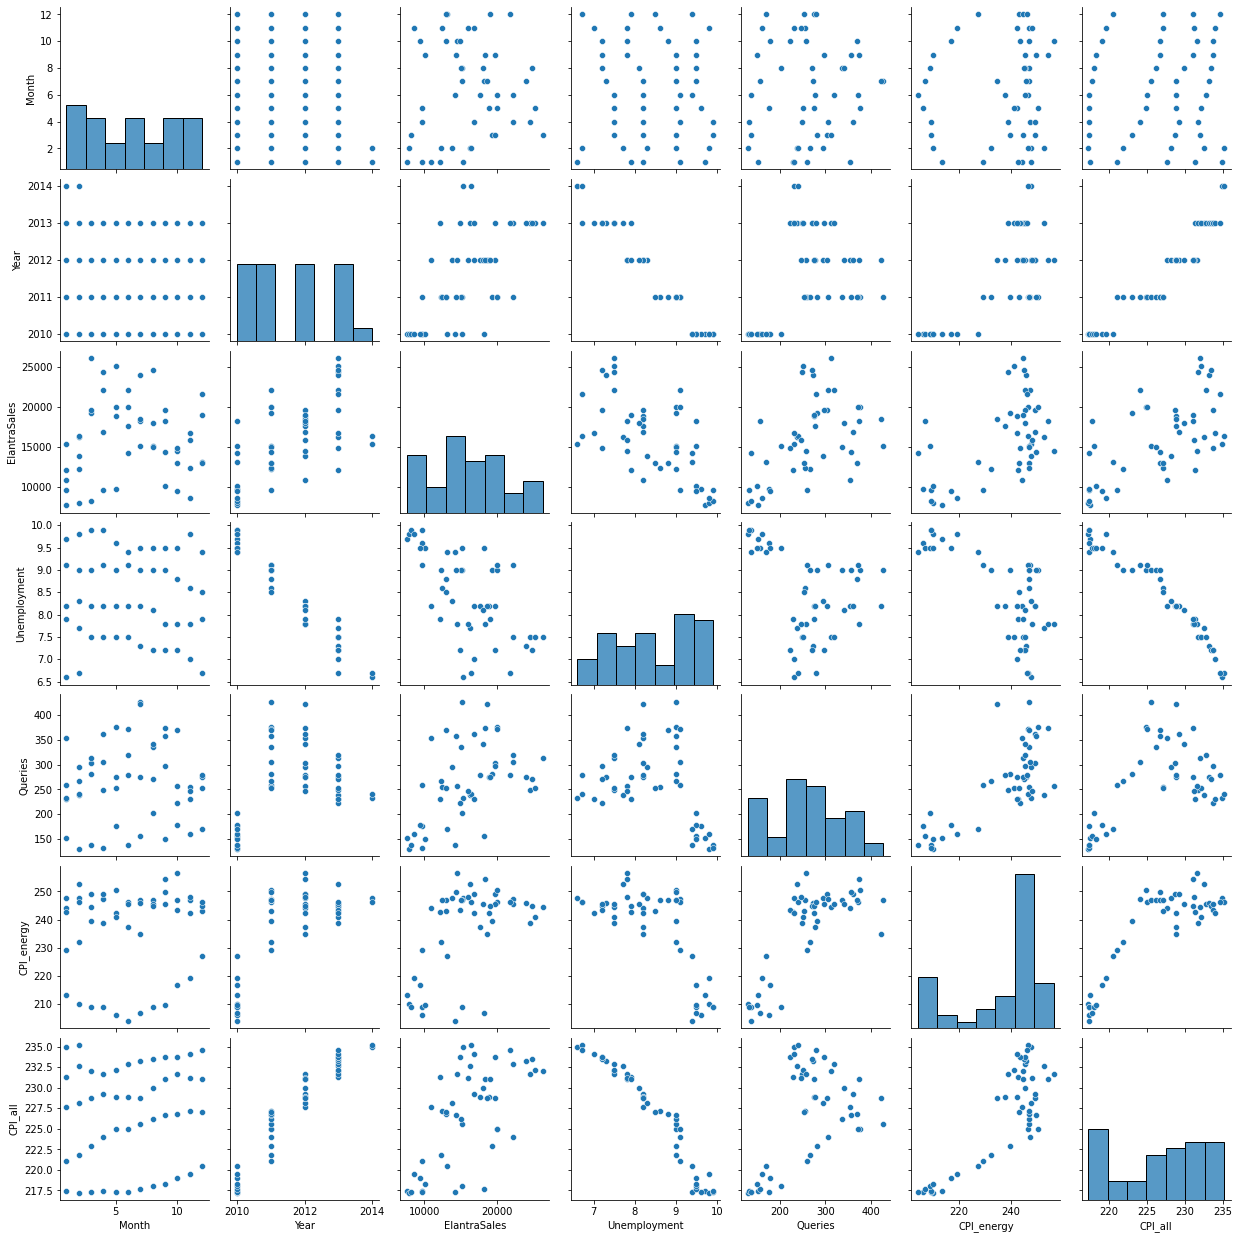

In [7]:
sns.pairplot(df);

In [8]:
X = df.drop('ElantraSales',axis=1)
y = df[['ElantraSales']]

In [9]:
print(X.shape, y.shape)

(50, 6) (50, 1)


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 6) (15, 6) (35, 1) (15, 1)


In [12]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Month,Year,Unemployment,Queries,CPI_energy,CPI_all,ElantraSales
7,2,2012,8.3,296,247.615,228.138,13820
14,4,2010,9.9,132,209.024,217.376,9657
45,11,2013,7.0,231,242.301,234.033,16751
48,12,2012,7.9,275,244.698,231.099,19024
29,7,2013,7.3,274,245.926,233.252,23958


In [13]:
data_train.shape

(35, 7)

In [14]:
data_train.columns

Index(['Month', 'Year', 'Unemployment', 'Queries', 'CPI_energy', 'CPI_all',
       'ElantraSales'],
      dtype='object')

### Building Model 1 without the Month & Year variables

In [15]:
expr1= 'ElantraSales ~  Unemployment  + Queries  + CPI_energy  + CPI_all'

In [16]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr1, data = data_train).fit()
lm1.params

Intercept      -59688.052439
Unemployment    -1172.793091
Queries            45.096850
CPI_energy       -195.978158
CPI_all           531.509647
dtype: float64

In [17]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           ElantraSales   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     10.29
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.29e-05
Time:                        18:00:49   Log-Likelihood:                -332.09
No. Observations:                  35   AIC:                             674.2
Df Residuals:                      30   BIC:                             682.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.969e+04   1.89e+05     -0.315   

In [18]:
# Calculate MSE
mse_train_1 = np.mean((lm1.predict(data_train.drop('ElantraSales',axis=1))-data_train['ElantraSales'])**2)

In [19]:
#Root Mean Squared Error - RMSE
train_rmse_1 = np.sqrt(mse_train_1)
train_rmse_1

3195.4538455070174

In [20]:
mse_test_1 = np.mean((lm1.predict(data_test.drop('ElantraSales',axis=1))-data_test['ElantraSales'])**2)

In [21]:
test_rmse_1 = np.sqrt(mse_test_1)
test_rmse_1

4558.707026887796

In [22]:
R_squared_1 = 0.578
Adj_R_squared_1 = 0.522

### Building Model 2 Including Month & Year Variables

In [23]:
data_train.shape

(35, 7)

In [24]:
data_test.shape

(15, 7)

In [25]:
data_train.columns

Index(['Month', 'Year', 'Unemployment', 'Queries', 'CPI_energy', 'CPI_all',
       'ElantraSales'],
      dtype='object')

In [26]:
expr2= 'ElantraSales ~  Unemployment  + Queries  + CPI_energy  + CPI_all  + Month + Year'

In [27]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= expr2, data = data_train).fit()
lm2.params

Intercept      -1.410497e+07
Unemployment    1.257666e+03
Queries         4.391239e+01
CPI_energy     -6.803634e+01
CPI_all        -7.718199e+02
Month           4.987213e+02
Year            7.102391e+03
dtype: float64

In [28]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           ElantraSales   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     7.000
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           0.000127
Time:                        18:00:50   Log-Likelihood:                -331.17
No. Observations:                  35   AIC:                             676.3
Df Residuals:                      28   BIC:                             687.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -1.41e+07   1.16e+07     -1.217   

In [29]:
# Calculate MSE
mse_train_2 = np.mean((lm2.predict(data_train.drop('ElantraSales',axis=1))-data_train['ElantraSales'])**2)

In [30]:
#Root Mean Squared Error - RMSE
train_rmse_2 = np.sqrt(mse_train_2)
train_rmse_2

3112.456125538256

In [31]:
# Calculate MSE
mse_test_2 = np.mean((lm2.predict(data_test.drop('ElantraSales',axis=1))-data_test['ElantraSales'])**2)

In [32]:
#Root Mean Squared Error - RMSE
test_rmse_2 = np.sqrt(mse_test_2)
test_rmse_2

4519.834105702944

In [33]:
R_squared_2 = 0.600
Adj_R_squared_2 = 0.514

### Building Model 3 Including Month & Year factors in the model

In [34]:
df_dummies = pd.get_dummies(df, columns=['Month','Year'],drop_first=True)

In [35]:
df_dummies.head()

,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012,Year_2013,Year_2014
0,7690,9.7,153,213.377,217.466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9659,9.1,259,229.353,221.082,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,10900,8.2,354,244.178,227.666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12174,7.9,230,242.560,231.321,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15326,6.6,232,247.575,234.933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
X = df_dummies.drop('ElantraSales',axis=1)
y = df_dummies[['ElantraSales']]

In [37]:
print(X.shape, y.shape)

(50, 19) (50, 1)


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [39]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 19) (15, 19) (35, 1) (15, 1)


In [40]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Unemployment,Queries,CPI_energy,CPI_all,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012,Year_2013,Year_2014,ElantraSales
7,8.3,296,247.615,228.138,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13820
14,9.9,132,209.024,217.376,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9657
45,7.0,231,242.301,234.033,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,16751
48,7.9,275,244.698,231.099,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,19024
29,7.3,274,245.926,233.252,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,23958


In [41]:
data_train.shape

(35, 20)

In [42]:
data_train.columns

Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'ElantraSales'],
      dtype='object')

In [43]:
expr3= 'ElantraSales ~  Unemployment  + Queries  + CPI_energy  + CPI_all  + Month_2  + Month_3  + Month_4  + Month_5  + Month_6  + Month_7  + Month_8  + Month_9  + Month_10  + Month_11  + Month_12  + Year_2011  + Year_2012  + Year_2013  + Year_2014' 

In [44]:
import statsmodels.formula.api as smf
lm3 = smf.ols(formula= expr3, data = data_train).fit()
lm3.params

Intercept       290910.117750
Unemployment     -3926.939097
Queries              6.552286
CPI_energy         206.745580
CPI_all          -1343.425559
Month_2           2281.309580
Month_3           9855.076809
Month_4           8437.776143
Month_5          10014.538413
Month_6           9251.634612
Month_7           9921.862972
Month_8           9184.674546
Month_9           6438.281371
Month_10          4490.804828
Month_11          4944.861731
Month_12          7622.695768
Year_2011         3163.876933
Year_2012         6401.469083
Year_2013        12509.933246
Year_2014        12931.724509
dtype: float64

In [45]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:           ElantraSales   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     8.566
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.75e-05
Time:                        18:00:50   Log-Likelihood:                -303.94
No. Observations:                  35   AIC:                             647.9
Df Residuals:                      15   BIC:                             679.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.909e+05   2.17e+05      1.340   

In [46]:
# Calculate MSE
mse_train_3 = np.mean((lm3.predict(data_train.drop('ElantraSales',axis=1))-data_train['ElantraSales'])**2)

In [47]:
#Root Mean Squared Error - RMSE
train_rmse_3 = np.sqrt(mse_train_3)
train_rmse_3

1429.5948907976897

In [48]:
# Calculate MSE
mse_test_3 = np.mean((lm3.predict(data_test.drop('ElantraSales',axis=1))-data_test['ElantraSales'])**2)

In [49]:
#Root Mean Squared Error - RMSE
test_rmse_3 = np.sqrt(mse_test_3)
test_rmse_3

2718.9179638529895

In [50]:
R_squared_3 = 0.916
Adj_R_squared_3 = 0.809

### Comparing results

In [51]:
resultsDf1 = pd.DataFrame({'Train RMSE': [train_rmse_1],'Test RMSE': [test_rmse_1], 'R-Squared': [R_squared_1], 'Adj R-Squared': [Adj_R_squared_1]},index=['Model1'])
resultsDf1

,Train RMSE,Test RMSE,R-Squared,Adj R-Squared
Model1,3195.453846,4558.707027,0.578,0.522


In [52]:
resultsDf2 = pd.DataFrame({'Train RMSE': [train_rmse_2],'Test RMSE': [test_rmse_2], 'R-Squared': [R_squared_2], 'Adj R-Squared': [Adj_R_squared_2]},index=['Model2'])
resultsDf2

,Train RMSE,Test RMSE,R-Squared,Adj R-Squared
Model2,3112.456126,4519.834106,0.6,0.514


In [53]:
resultsDf3 = pd.DataFrame({'Train RMSE': [train_rmse_3],'Test RMSE': [test_rmse_3], 'R-Squared': [R_squared_3], 'Adj R-Squared': [Adj_R_squared_3]},index=['Model3'])
resultsDf3

,Train RMSE,Test RMSE,R-Squared,Adj R-Squared
Model3,1429.594891,2718.917964,0.916,0.809


In [54]:
frames = [resultsDf1, resultsDf2, resultsDf3]
results = pd.concat(frames)

In [55]:
results

,Train RMSE,Test RMSE,R-Squared,Adj R-Squared
Model1,3195.453846,4558.707027,0.578,0.522
Model2,3112.456126,4519.834106,0.600,0.514
Model3,1429.594891,2718.917964,0.916,0.809


### Building a model by dropping the 2 highly correlated variables viz. CPI_energy & CPI_all

In [56]:
print(X.shape, y.shape)

(50, 19) (50, 1)


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [58]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 19) (15, 19) (35, 1) (15, 1)


In [59]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Unemployment,Queries,CPI_energy,CPI_all,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012,Year_2013,Year_2014,ElantraSales
7,8.3,296,247.615,228.138,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13820
14,9.9,132,209.024,217.376,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9657
45,7.0,231,242.301,234.033,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,16751
48,7.9,275,244.698,231.099,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,19024
29,7.3,274,245.926,233.252,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,23958


In [60]:
data_train.shape

(35, 20)

In [61]:
data_train.columns

Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'ElantraSales'],
      dtype='object')

In [62]:
expr4= 'ElantraSales ~  Unemployment  + Queries  + Month_2  + Month_3  + Month_4  + Month_5  + Month_6  + Month_7  + Month_8  + Month_9  + Month_10  + Month_11  + Month_12  + Year_2011  + Year_2012  + Year_2013  + Year_2014' 

In [63]:
import statsmodels.formula.api as smf
lm4 = smf.ols(formula= expr4, data = data_train).fit()
lm4.params

Intercept       28820.139410
Unemployment    -2557.239656
Queries            15.038953
Month_2          2322.362713
Month_3          9331.507173
Month_4          7512.061835
Month_5          8793.853469
Month_6          7160.571167
Month_7          8298.456085
Month_8          6671.097109
Month_9          4096.382621
Month_10         1782.195251
Month_11         2298.586900
Month_12         4814.751956
Year_2011         299.292043
Year_2012        -971.206346
Year_2013        1386.580986
Year_2014       -1225.345048
dtype: float64

In [64]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:           ElantraSales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     9.395
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.45e-05
Time:                        18:00:52   Log-Likelihood:                -306.23
No. Observations:                  35   AIC:                             648.5
Df Residuals:                      17   BIC:                             676.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.882e+04   3.08e+04      0.935   

In [65]:
# Calculate MSE
mse_train_4 = np.mean((lm4.predict(data_train.drop('ElantraSales',axis=1))-data_train['ElantraSales'])**2)

In [66]:
#Root Mean Squared Error - RMSE
train_rmse_4 = np.sqrt(mse_train_4)
train_rmse_4

1526.3435454832206

In [67]:
# Calculate MSE
mse_test_4 = np.mean((lm4.predict(data_test.drop('ElantraSales',axis=1))-data_test['ElantraSales'])**2)

In [68]:
#Root Mean Squared Error - RMSE
test_rmse_4 = np.sqrt(mse_test_4)
test_rmse_4

3187.4688545646627

In [69]:
R_squared_4 = 0.904
Adj_R_squared_4 = 0.808

In [70]:
resultsDf4 = pd.DataFrame({'Train RMSE': [train_rmse_4],'Test RMSE': [test_rmse_4], 'R-Squared': [R_squared_4], 'Adj R-Squared': [Adj_R_squared_4]},index=['Model4'])
resultsDf4

,Train RMSE,Test RMSE,R-Squared,Adj R-Squared
Model4,1526.343545,3187.468855,0.904,0.808


In [71]:
frames = [resultsDf1, resultsDf2, resultsDf3, resultsDf4]
results = pd.concat(frames)

In [72]:
results

,Train RMSE,Test RMSE,R-Squared,Adj R-Squared
Model1,3195.453846,4558.707027,0.578,0.522
Model2,3112.456126,4519.834106,0.600,0.514
Model3,1429.594891,2718.917964,0.916,0.809
Model4,1526.343545,3187.468855,0.904,0.808
